In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import importlib
import pandas as pd
import matplotlib.gridspec as gridspec
import time

import sys
sys.path.append('../scripts')

import sirs
import params
import plotting
from params import cols

from pylab import cm
import matplotlib as mpl
from matplotlib import colors

plotting.set_rcParams()

This notebook provides code to plot the largest lyapunov exponent, coexisting attractors and the influence of parameter perturbations in the $\tau$-$m_{max}$ plane. For the coexisting attractors the data has an extra dimension for the different initial conditions with which the system was initialized. 

In [3]:
clustertype = '.npz'

clusterpath_coex = '../simulations/cluster/coexistingattractors/'
clusterfile_coex = 'InfectionData_inset'
Data_coex = np.load(clusterpath_coex+clusterfile_coex+clustertype)

clusterpath_LLE = '../simulations/cluster/lyapunovexponent/'
clusterfile_LLE = 'InfectionData_LLE'
Data_LLE = np.load(clusterpath_LLE+clusterfile_LLE+clustertype)

In [4]:
def cluster_plot_coex(ax,Data,cmap,xlim=None,ylim=None,what='wind_no',how='diff'):
    cluster_tauline = Data['tau_vec']
    cluster_mmaxline = Data['M_max_vec']
    cluster_M = Data[what][:,:,:]
    
    idx1 = 0
    idx2 = -1
    idy1 = 0
    idy2 = -1
        
    if xlim and ylim:
        idx1 = round((xlim[0]-cluster_tauline[0])/(cluster_tauline[-1]-cluster_tauline[0])*len(cluster_tauline))
        idx2 = round((xlim[1]-cluster_tauline[0])/(cluster_tauline[-1]-cluster_tauline[0])*len(cluster_tauline))
        idy1 = round((ylim[0]-cluster_mmaxline[0])/(cluster_mmaxline[-1]-cluster_mmaxline[0])*len(cluster_mmaxline))
        idy2 = round((ylim[1]-cluster_mmaxline[0])/(cluster_mmaxline[-1]-cluster_mmaxline[0])*len(cluster_mmaxline))
        cluster_tauline = cluster_tauline[cluster_tauline>=xlim[0]]
        cluster_tauline = cluster_tauline[cluster_tauline<=xlim[1]]  
        cluster_mmaxline = cluster_mmaxline[cluster_mmaxline>=ylim[0]]
        cluster_mmaxline = cluster_mmaxline[cluster_mmaxline<=ylim[1]]
        

    cluster_M = np.flip(np.flip(cluster_M[idy1:idy2,idx1:idx2]),axis=1)    
    
    if how == 'diff':
        M = np.max(cluster_M,axis=2)-np.min(cluster_M,axis=2)
    elif how == 'max':
        M = np.max(cluster_M,axis=2)
    elif how == 'min':
        M = np.min(cluster_M,axis=2)
    else:
        print('no valid how argument')
        return None 
    
    show = ax.imshow(M,aspect='auto', extent=(cluster_tauline.min(), cluster_tauline.max(), cluster_mmaxline.min(), cluster_mmaxline.max()), \
          cmap=cmap,interpolation='None')
    print('Max val:',np.max(M),'Min val:',np.min(M))
    return show

In [6]:
def cluster_plot_LLE(ax,Data,cmap='coolwarm',xlim=None,ylim=None):
    cluster_tauline = Data['tau_vec']
    cluster_mmaxline = Data['M_max_vec']
    cluster_M_LLE = 360*Data['LLE'][:,:]
    
    idx1 = 0
    idx2 = -1
    idy1 = 0
    idy2 = -1
    
    if xlim and ylim:
        idx1 = round((xlim[0]-cluster_tauline[0])/(cluster_tauline[-1]-cluster_tauline[0])*len(cluster_tauline))
        idx2 = round((xlim[1]-cluster_tauline[0])/(cluster_tauline[-1]-cluster_tauline[0])*len(cluster_tauline))
        idy1 = round((ylim[0]-cluster_mmaxline[0])/(cluster_mmaxline[-1]-cluster_mmaxline[0])*len(cluster_mmaxline))
        idy2 = round((ylim[1]-cluster_mmaxline[0])/(cluster_mmaxline[-1]-cluster_mmaxline[0])*len(cluster_mmaxline))
        cluster_tauline = cluster_tauline[cluster_tauline>=xlim[0]]
        cluster_tauline = cluster_tauline[cluster_tauline<=xlim[1]]  
        cluster_mmaxline = cluster_mmaxline[cluster_mmaxline>=ylim[0]]
        cluster_mmaxline = cluster_mmaxline[cluster_mmaxline<=ylim[1]]
        
    cluster_M_LLE = np.flip(np.flip(cluster_M_LLE[idy1:idy2,idx1:idx2]),axis=1)
    
    divnorm = colors.TwoSlopeNorm(vmin=np.min(cluster_M_LLE), vcenter=0., vmax=np.max(cluster_M_LLE)) 
    
    show = ax.imshow(cluster_M_LLE,aspect='auto', extent=(cluster_tauline.min(), cluster_tauline.max(), cluster_mmaxline.min(), cluster_mmaxline.max()), \
          cmap=cmap,interpolation='None',norm=divnorm)
    print('Max LLE:',np.max(cluster_M_LLE),'Min LLE:',np.min(cluster_M_LLE))
    return show 

### Largest Lyapunov exponent

Max LLE: 0.6018417666432694 Min LLE: -1.1190334501210468


Text(0, 0.5, 'maximal mitigation $m_{max}$')

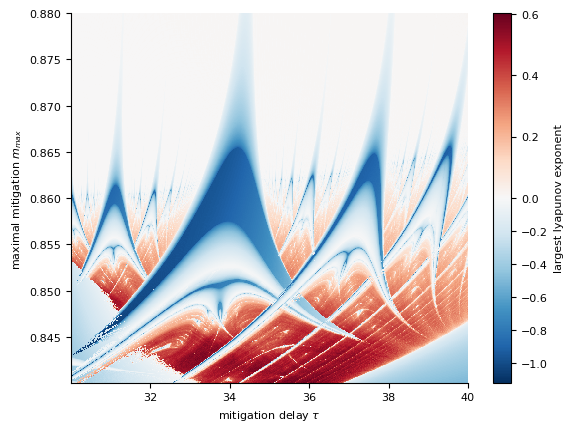

In [20]:
fig,ax = plt.subplots()

show = cluster_plot_LLE(ax,Data_LLE,xlim=(30,40),ylim=(0.84,0.88),cmap='RdBu_r')
cbar = plt.colorbar(show,ax=ax)
cbar.set_label('largest lyapunov exponent')


ax.set_xlabel(r'mitigation delay $\tau$')
ax.set_ylabel('maximal mitigation $m_{max}$')

### Coexisting attractors

Indicate with the 'what' argument whether to plot the winding number (peaks per year) or infection numbers. All options: wind_no (peaks per year), av_inf_no (mean infections), Smin, Smax, Imin, Imax (susceptible and infectious min and max resp.)


With the 'how' argument indicate whether to plot the difference between the min and max attractors or the min or the max (for a given measure, e.g. mean infections)

Max val: 0.5 Min val: 0.0


Text(0, 0.5, 'maximal mitigation $m_{max}$')

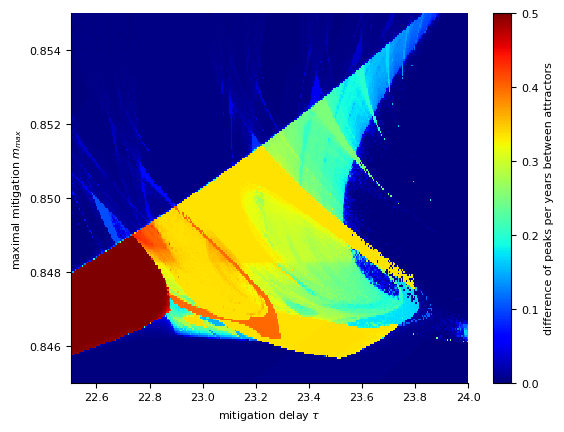

In [13]:
fig,ax = plt.subplots()

show = cluster_plot_coex(ax,Data_coex,'jet',ylim=(0.845,0.855),xlim=(22.5,24),what='wind_no',how='diff')
cbar = plt.colorbar(show,ax=ax)
cbar.set_label('difference of peaks per years between attractors')

ax.set_xlabel(r'mitigation delay $\tau$')
ax.set_ylabel('maximal mitigation $m_{max}$');


Max val: 0.0007474280842125981 Min val: 2.7798943702528334e-16


Text(0, 0.5, 'maximal mitigation $m_{max}$')

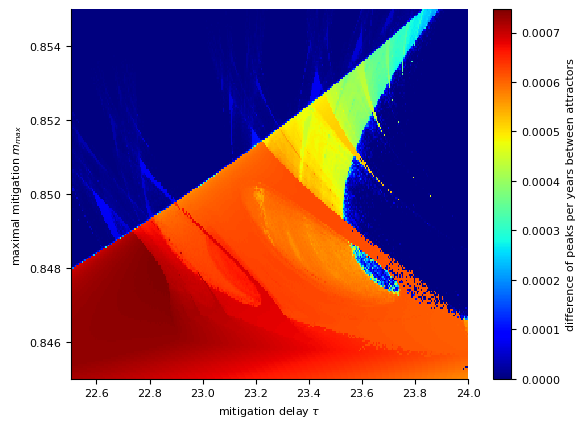

In [27]:
fig,ax = plt.subplots()

show = cluster_plot_coex(ax,Data_coex,'jet',ylim=(0.845,0.855),xlim=(22.5,24),what='av_inf_no',how='diff')
cbar = plt.colorbar(show,ax=ax)
cbar.set_label('difference of average infections between attractors')

ax.set_xlabel(r'mitigation delay $\tau$')
ax.set_ylabel('maximal mitigation $m_{max}$');

### Parameter perturbations

The data file used for the parameter perturbations was cretaed using a C script and contains the winding number and average infections for the $\tau$-$m_{max}$ parameter plane. The Gaussian filter to model parameter perturbations is applied in the plotting function.

In [39]:
perturbation = '../simulations/cluster/arnoldtongues/arnold_mmax=07-1_tau=0-50_a=025_inset.dat'

res_pert = pd.read_table(perturbation,sep=',')
res_pert = res_pert[res_pert['tau']!=0.1]

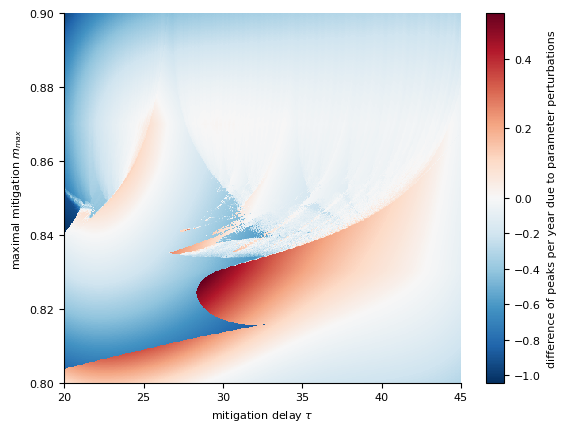

In [40]:
fig,ax = plt.subplots()

importlib.reload(plotting)

show = plotting.plot_perturbation(ax,res_pert,variable='W')

cbar = plt.colorbar(show,ax=ax)
cbar.set_label('difference of peaks per year due to parameter perturbations')

ax.set_xlabel(r'mitigation delay $\tau$')
ax.set_ylabel('maximal mitigation $m_{max}$');

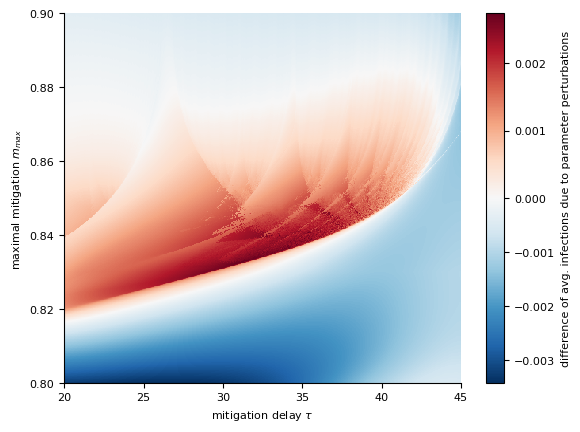

In [41]:
fig,ax = plt.subplots()

importlib.reload(plotting)

show = plotting.plot_perturbation(ax,res_pert,variable='av_I')

cbar = plt.colorbar(show,ax=ax)
cbar.set_label('difference of avg. infections due to parameter perturbations')

ax.set_xlabel(r'mitigation delay $\tau$')
ax.set_ylabel('maximal mitigation $m_{max}$');